HTTPSConnectionPool(host='api.example.com', port=443): Max retries exceeded with url: /current_quiz_data (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7d4a15ff5a10>: Failed to resolve 'api.example.com' ([Errno -2] Name or service not known)"))


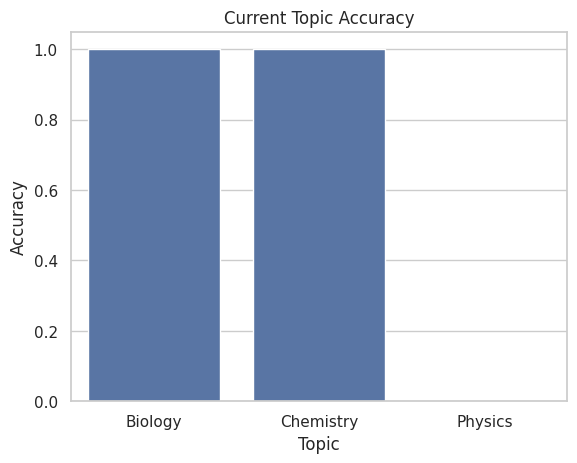

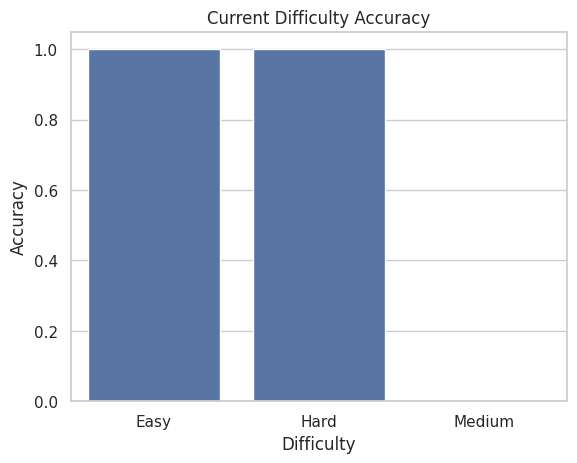

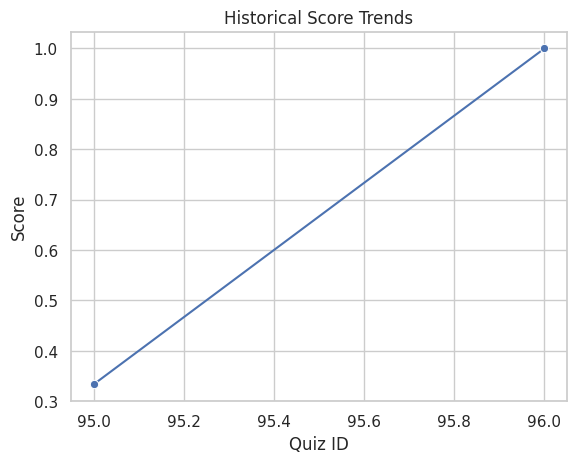

Personalized Recommendations:
- Focus on improving these topics: Physics.
- Practice more questions of Medium difficulty.
- Great job! Your performance is improving. Keep practicing!


In [ ]:
# Install required libraries
!pip install pandas matplotlib seaborn requests

# Import necessary libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Configure Seaborn
sns.set(style="whitegrid")

# Data fetching and loading
def fetch_data(api_url):
    """
    Fetch data from the provided API endpoint.
    """
    response = requests.get(api_url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to fetch data from {api_url}")

# Sample API URLs (replace these with actual endpoints or local file paths)
current_quiz_api = "https://api.example.com/current_quiz_data"
historical_quiz_api = "https://api.example.com/historical_quiz_data"

# Load the data
try:
    current_quiz_data = fetch_data(current_quiz_api)
    historical_quiz_data = fetch_data(historical_quiz_api)
except Exception as e:
    print(e)
    # For offline testing, use dummy data
    current_quiz_data = {
        "user_id": 1,
        "quiz_id": 101,
        "questions": [
            {"question_id": 1, "topic": "Physics", "difficulty": "Medium", "correct": False},
            {"question_id": 2, "topic": "Chemistry", "difficulty": "Hard", "correct": True},
            {"question_id": 3, "topic": "Biology", "difficulty": "Easy", "correct": True}
        ]
    }
    historical_quiz_data = [
        {"quiz_id": 95, "user_id": 1, "score": 80, "questions": [
            {"question_id": 1, "topic": "Physics", "difficulty": "Medium", "correct": False},
            {"question_id": 2, "topic": "Chemistry", "difficulty": "Hard", "correct": False},
            {"question_id": 3, "topic": "Biology", "difficulty": "Easy", "correct": True}
        ]},
        {"quiz_id": 96, "user_id": 1, "score": 85, "questions": [
            {"question_id": 4, "topic": "Physics", "difficulty": "Hard", "correct": True},
            {"question_id": 5, "topic": "Chemistry", "difficulty": "Medium", "correct": True},
            {"question_id": 6, "topic": "Biology", "difficulty": "Easy", "correct": True}
        ]}
    ]

# Convert data to DataFrames for analysis
def process_quiz_data(current_data, historical_data):
    """
    Process current and historical quiz data into structured DataFrames.
    """
    # Current quiz
    current_df = pd.DataFrame(current_data["questions"])
    current_df["quiz_id"] = current_data["quiz_id"]
    current_df["user_id"] = current_data["user_id"]

    # Historical quizzes
    historical_quizzes = []
    for quiz in historical_data:
        for question in quiz["questions"]:
            question["quiz_id"] = quiz["quiz_id"]
            question["user_id"] = quiz["user_id"]
        historical_quizzes.extend(quiz["questions"])

    historical_df = pd.DataFrame(historical_quizzes)
    return current_df, historical_df

current_df, historical_df = process_quiz_data(current_quiz_data, historical_quiz_data)

# Analyze performance
def analyze_performance(current_df, historical_df):
    """
    Analyze student performance and generate insights.
    """
    # Topic-wise accuracy
    current_topic_accuracy = current_df.groupby("topic")["correct"].mean().reset_index()
    historical_topic_accuracy = historical_df.groupby("topic")["correct"].mean().reset_index()

    # Difficulty-wise accuracy
    current_difficulty_accuracy = current_df.groupby("difficulty")["correct"].mean().reset_index()
    historical_difficulty_accuracy = historical_df.groupby("difficulty")["correct"].mean().reset_index()

    # Overall score trends
    historical_scores = historical_df.groupby("quiz_id").agg(score=("correct", "mean")).reset_index()
    return {
        "current_topic_accuracy": current_topic_accuracy,
        "historical_topic_accuracy": historical_topic_accuracy,
        "current_difficulty_accuracy": current_difficulty_accuracy,
        "historical_difficulty_accuracy": historical_difficulty_accuracy,
        "historical_scores": historical_scores
    }

performance_insights = analyze_performance(current_df, historical_df)

# Generate recommendations
def generate_recommendations(performance_insights):
    """
    Generate personalized recommendations based on performance insights.
    """
    recommendations = []

    # Weak topics
    weak_topics = performance_insights["current_topic_accuracy"].query("correct < 0.5")["topic"].tolist()
    if weak_topics:
        recommendations.append(f"Focus on improving these topics: {', '.join(weak_topics)}.")

    # Difficulty level focus
    weak_difficulty = performance_insights["current_difficulty_accuracy"].query("correct < 0.5")["difficulty"].tolist()
    if weak_difficulty:
        recommendations.append(f"Practice more questions of {', '.join(weak_difficulty)} difficulty.")

    # General trend
    if performance_insights["historical_scores"]["score"].iloc[-1] > performance_insights["historical_scores"]["score"].iloc[0]:
        recommendations.append("Great job! Your performance is improving. Keep practicing!")
    else:
        recommendations.append("Your performance is stagnant. Review past mistakes for improvement.")

    return recommendations

recommendations = generate_recommendations(performance_insights)

# Visualize insights
def visualize_insights(performance_insights):
    """
    Create visualizations for topic and difficulty performance.
    """
    # Topic-wise accuracy
    sns.barplot(data=performance_insights["current_topic_accuracy"], x="topic", y="correct")
    plt.title("Current Topic Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Topic")
    plt.show()

    # Difficulty-wise accuracy
    sns.barplot(data=performance_insights["current_difficulty_accuracy"], x="difficulty", y="correct")
    plt.title("Current Difficulty Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Difficulty")
    plt.show()

    # Score trends
    sns.lineplot(data=performance_insights["historical_scores"], x="quiz_id", y="score", marker="o")
    plt.title("Historical Score Trends")
    plt.ylabel("Score")
    plt.xlabel("Quiz ID")
    plt.show()

visualize_insights(performance_insights)

# Print recommendations
print("Personalized Recommendations:")
for rec in recommendations:
    print(f"- {rec}")
